In [97]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger

In [99]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'D:/Trinity_DS/Dissertations/201901/Datasets/release/bin'

In [200]:
#!easy_install textblob
import pandas as pd
import textstat
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
from sklearn.feature_selection import chi2
import scipy.stats as stats
import scikitplot as skplt
from sklearn.metrics import f1_score
from spellchecker import SpellChecker
from sklearn.linear_model import Ridge

In [101]:
path="D:/Trinity_DS/Dissertations/201907/politness/politness_predicted/amazon_polite.csv"

In [102]:
data_df = pd.read_csv(path,low_memory=False)

In [103]:
temp_df= data_df[['reviews.numHelpful','reviews.rating']]
temp_df.describe()

,reviews.numHelpful,reviews.rating
count,34131.000000,34627.000000
mean,0.630248,4.584573
std,13.215775,0.735653
min,0.000000,1.000000
25%,0.000000,4.000000
50%,0.000000,5.000000
75%,0.000000,5.000000
max,814.000000,5.000000


In [104]:
data_df.dtypes

Unnamed: 0                int64
id                       object
name                     object
asins                    object
brand                    object
categories               object
keys                     object
manufacturer             object
reviews.date             object
reviews.dateAdded        object
reviews.didPurchase      object
reviews.doRecommend      object
reviews.id              float64
reviews.numHelpful      float64
reviews.rating          float64
reviews.sourceURLs       object
reviews.text             object
reviews.title            object
reviews.userCity        float64
reviews.userProvince    float64
reviews.username         object
reviews.dateSeen         object
A1                       object
A2                       object
A3                       object
A4                       object
A5                       object
A6                       object
A7                       object
A8                       object
                         ...   
A18     

In [105]:
data_df['reviews_dateAdded_Date_time'] =  pd.to_datetime(data_df['reviews.dateAdded'])
data_df['reviews_dateSeen_Date_time'] =  pd.to_datetime(data_df['reviews.dateSeen'])
data_df['reviews_date_Date_time'] =  pd.to_datetime(data_df['reviews.date'])

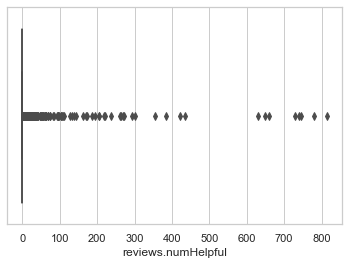

In [106]:
import seaborn as sns
temp_df_box=data_df
sns.set(style="whitegrid")
ax = sns.boxplot(x=temp_df_box["reviews.numHelpful"])


In [107]:
temp_df_box['log_usefull']=np.log(temp_df_box['reviews.numHelpful']+1)

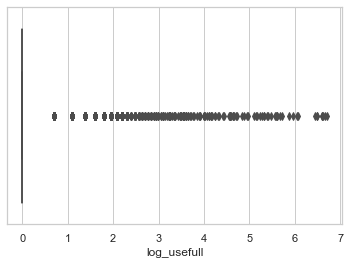

In [108]:
ax = sns.boxplot(x=temp_df_box["log_usefull"])

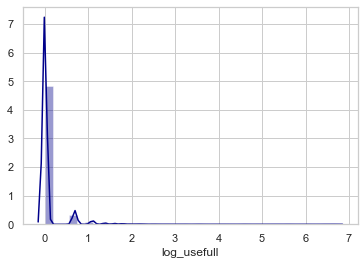

In [109]:
sns.distplot(temp_df_box["log_usefull"].dropna(),bins=int(180/5),  hist=True, kde=True, color = 'darkblue', 
            )

In [110]:
data_df[['reviews.date']]

,reviews.date
0,2017-01-13T00:00:00.000Z
1,2017-01-13T00:00:00.000Z
2,2017-01-13T00:00:00.000Z
3,2017-01-13T00:00:00.000Z
4,2017-01-12T00:00:00.000Z
5,2017-01-12T00:00:00.000Z
6,2017-01-12T00:00:00.000Z
7,2017-01-12T00:00:00.000Z
8,2017-01-23T00:00:00.000Z
9,2017-01-23T00:00:00.000Z


In [111]:
filtered_df = data_df[data_df['reviews_dateAdded_Date_time'].notnull()]
filtered_df = data_df[data_df['reviews_date_Date_time'].notnull()]

In [112]:
filtered_df['diff_days'] = filtered_df['reviews_dateSeen_Date_time'] - filtered_df['reviews_date_Date_time']
filtered_df['diff_days']=filtered_df['diff_days']/np.timedelta64(1,'D')


D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [113]:
filtered_df

,Unnamed: 0,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,...,A43,A44,A45,A46,politeness,reviews_dateAdded_Date_time,reviews_dateSeen_Date_time,reviews_date_Date_time,log_usefull,diff_days
0,1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,NaN,0.187876,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,0.000000,145.377778
1,2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,NaN,0.195827,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,0.000000,145.377778
2,3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,NaN,0.212887,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,0.000000,145.377778
3,4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,NaN,0.710976,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,0.000000,145.377778
4,5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,NaN,0.678110,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,0.000000,146.377778
5,6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,NaN,0.380223,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,0.000000,146.377778
6,7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,NaN,0.215795,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,0.000000,146.377778
7,8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,NaN,0.338726,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,0.000000,146.377778
8,9,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-23T00:00:00.000Z,2017-07-03T23:28:24Z,...,NaN,NaN,NaN,NaN,0.526031,2017-07-03 23:28:24+00:00,2017-06-07 09:04:00+00:00,2017-01-23 00:00:00+00:00,0.000000,135.377778
9,10,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-23T00:00:00.000Z,2017-07-03T23:28:24Z,...,NaN,NaN,NaN,NaN,0.186143,2017-07-03 23:28:24+00:00,2017-06-07 09:04:00+00:00,2017-01-23 00:00:00+00:00,0.0000

In [114]:
filtered_df['usefull_diff'] = filtered_df['reviews.numHelpful']/filtered_df['diff_days']

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
filtered_df

,Unnamed: 0,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,...,A44,A45,A46,politeness,reviews_dateAdded_Date_time,reviews_dateSeen_Date_time,reviews_date_Date_time,log_usefull,diff_days,usefull_diff
0,1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,0.187876,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,0.000000,145.377778,0.000000
1,2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,0.195827,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,0.000000,145.377778,0.000000
2,3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,0.212887,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,0.000000,145.377778,0.000000
3,4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,0.710976,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-13 00:00:00+00:00,0.000000,145.377778,0.000000
4,5,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,0.678110,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,0.000000,146.377778,0.000000
5,6,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,0.380223,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,0.000000,146.377778,0.000000
6,7,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,0.215795,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,0.000000,146.377778,0.000000
7,8,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,...,NaN,NaN,NaN,0.338726,2017-07-03 23:33:15+00:00,2017-06-07 09:04:00+00:00,2017-01-12 00:00:00+00:00,0.000000,146.377778,0.000000
8,9,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-23T00:00:00.000Z,2017-07-03T23:28:24Z,...,NaN,NaN,NaN,0.526031,2017-07-03 23:28:24+00:00,2017-06-07 09:04:00+00:00,2017-01-23 00:00:00+00:00,0.000000,135.377778,0.000000
9,10,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-23T00:00:00.000Z,2017-07-03T23:28:24Z,...,NaN,NaN,NaN,0.186143,2017-07-03 23:28:24+00:00,2017-06-

In [116]:
filtered_df['usefull_bin'] = np.where(filtered_df['reviews.numHelpful']==0, '0', '1')

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
filtered_df['usefull_bin']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
34626    1
34628    1
34630    1
34631    1
34632    1
34633    1
34634    1
34635    1
34636    1
34637    1
34638    1
34639    1
34640    1
34642    1
34643    1
34644    1
34646    1
34647    1
34648    1
34649    1
34650    1
34651    1
34652    1
34653    1
34654    1
34655    1
34656    1
34657    1
34658    1
34659    1
Name: usefull_bin, Length: 34621, dtype: object

In [118]:
filtered_df['day_of_week'] = filtered_df['reviews_dateAdded_Date_time'].dt.weekday_name

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [119]:
filtered_df['reviews_dateAdded_hour'] = filtered_df['reviews_dateAdded_Date_time'].dt.hour

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
#textstat.flesch_reading_ease(.id)
readablity = []
for text in filtered_df['reviews.text']:
    readablity.append(textstat.flesch_reading_ease(str(text)))
filtered_df['flesch_reading_ease']=readablity

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [121]:
smog = []
for text in filtered_df['reviews.text']:
    smog.append(textstat.smog_index(str(text)))


In [122]:
coleman_liau=[]
for text in filtered_df['reviews.text']:
    coleman_liau.append(textstat.coleman_liau_index(str(text)))


In [123]:
sentence_count=[]
for text in filtered_df['reviews.text']:
    sentence_count.append(textstat.sentence_count(str(text)))

In [124]:
gunning_fog=[]
for text in filtered_df['reviews.text']:
    gunning_fog.append(textstat.gunning_fog(str(text)))

In [125]:
flesch_kincaid_grade=[]
for text in filtered_df['reviews.text']:
    flesch_kincaid_grade.append(textstat.flesch_kincaid_grade(str(text)))

In [126]:
subjectivity_list=[]
polarity_list=[]
for text in filtered_df['reviews.text']:
    subjectivity_list.append(TextBlob(str(text)).sentiment.subjectivity)
    polarity_list.append(TextBlob(str(text)).sentiment.polarity)

In [157]:
spell = SpellChecker()
spelling_errors=[]

for text in filtered_df['reviews.text']:
    spelling_errors.append(len(spell.unknown(str(text).split(' '))))

In [165]:
#textstat.flesch_reading_ease(.id)
readablity = []
for text in filtered_df['reviews.text']:
    readablity.append(textstat.flesch_reading_ease(str(text)))

In [166]:
filtered_df['smog']=smog
filtered_df['coleman_liau']=coleman_liau
filtered_df['sentence_count']=sentence_count
filtered_df['gunning_fog']=gunning_fog
filtered_df['flesch_kincaid_grade']=flesch_kincaid_grade
filtered_df['subjectivity']=subjectivity_list
filtered_df['polarity']=polarity_list
filtered_df['spelling_errors']=spelling_errors
filtered_df['flesch_reading_ease']=readablity

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

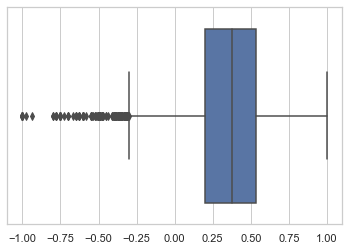

In [43]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=polarity_list)

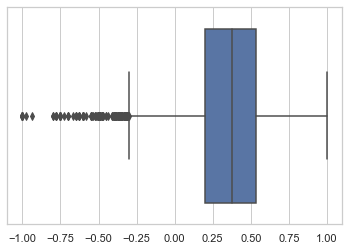

In [32]:
import matplotlib.pyplot as plt

sns.boxplot(x=polarity_list)
plt.savefig('boxplots/Amazon_polarity.png')

In [168]:
final_df = filtered_df[['diff_days','day_of_week','reviews_dateAdded_hour','reviews.rating','smog','coleman_liau','sentence_count','reviews.numHelpful','gunning_fog','flesch_kincaid_grade','usefull_bin','usefull_diff','subjectivity','polarity','politeness','spelling_errors','flesch_reading_ease']]

In [160]:
final_df=final_df.dropna()
final_df

,diff_days,day_of_week,reviews_dateAdded_hour,reviews.rating,smog,coleman_liau,sentence_count,reviews.numHelpful,gunning_fog,flesch_kincaid_grade,usefull_bin,usefull_diff,subjectivity,polarity,politeness,spelling_errors
0,145.377778,Monday,23.0,5.0,0.0,6.84,2,0.0,9.84,6.2,0,0.000000,0.783333,0.325000,0.187876,2
1,145.377778,Monday,23.0,5.0,0.0,5.34,2,0.0,8.51,3.7,0,0.000000,0.825000,0.800000,0.195827,1
2,145.377778,Monday,23.0,5.0,0.0,4.16,2,0.0,6.74,3.6,0,0.000000,0.700000,0.600000,0.212887,5
3,145.377778,Monday,23.0,4.0,9.5,6.51,4,0.0,12.75,10.0,0,0.000000,0.731250,0.374583,0.710976,10
4,146.377778,Monday,23.0,5.0,8.8,7.02,6,0.0,9.51,7.4,0,0.000000,0.616226,0.368056,0.678110,8
5,146.377778,Monday,23.0,5.0,3.1,3.01,3,0.0,6.00,4.4,0,0.000000,0.550000,0.375000,0.380223,3
6,146.377778,Monday,23.0,4.0,0.0,9.11,1,0.0,10.00,7.6,0,0.000000,0.637500,0.525000,0.215795,5
7,146.377778,Monday,23.0,5.0,0.0,5.03,2,0.0,6.74,4.8,0,0.000000,0.844444,0.544444,0.338726,3
8,135.377778,Monday,23.0,5.0,8.8,6.31,4,0.0,6.60,4.6,0,0.000000,0.763333,0.406667,0.526031,6
9,135.377778,Monday,23.0,5.0,0.0,7.34,1,0.0,8.00,4.8,0,0.000000,0.600000,0.500000,0.186143,1


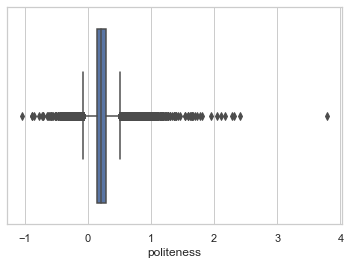

In [35]:
import matplotlib.pyplot as plt

sns.boxplot(x=final_df['politeness'])
plt.savefig('boxplots/Amazon_politeness.png')


In [36]:
list(final_df)

['diff_days',
 'day_of_week',
 'reviews_dateAdded_hour',
 'reviews.rating',
 'smog',
 'coleman_liau',
 'sentence_count',
 'reviews.numHelpful',
 'gunning_fog',
 'flesch_kincaid_grade',
 'usefull_bin',
 'usefull_diff',
 'subjectivity',
 'polarity',
 'politeness']

In [41]:
final_df.to_csv("amazon_processed_data.csv",index=False)

In [169]:
sent_df = final_df[['diff_days','reviews.rating','smog','coleman_liau','subjectivity','sentence_count','gunning_fog','flesch_kincaid_grade','reviews.numHelpful','politeness','polarity','flesch_reading_ease','spelling_errors']]
sns.set(style="white")

d = sent_df

corr = (d.corr())
corr

,diff_days,reviews.rating,smog,coleman_liau,subjectivity,sentence_count,gunning_fog,flesch_kincaid_grade,reviews.numHelpful,politeness,polarity,flesch_reading_ease,spelling_errors
diff_days,1.000000,-0.015401,0.068755,0.026096,0.007283,0.077558,0.042687,0.045802,0.149104,0.019897,-0.012350,-0.033083,0.095375
reviews.rating,-0.015401,1.000000,-0.072636,-0.026160,0.093195,-0.082626,-0.080248,-0.060564,-0.073958,0.184696,0.236159,0.025581,-0.097710
smog,0.068755,-0.072636,1.000000,0.023330,-0.028002,0.683618,0.044929,0.025650,0.068395,0.189122,-0.165088,-0.035663,0.569514
coleman_liau,0.026096,-0.026160,0.023330,1.000000,0.019141,-0.051235,0.436938,0.667935,0.019448,-0.056921,-0.023973,-0.732086,0.093865
subjectivity,0.007283,0.093195,-0.028002,0.019141,1.000000,-0.026519,-0.022256,-0.037405,-0.014176,0.056749,0.550348,0.012693,-0.030649
sentence_count,0.077558,-0.082626,0.683618,-0.051235,-0.026519,1.000000,-0.060462,-0.048242,0.136634,0.253186,-0.148165,0.027099,0.821718
gunning_fog,0.042687,-0.080248,0.044929,0.436938,-0.022256,-0.060462,1.000000,0.705578,0.046112,0.026070,-0.143266,-0.470783,0.199136
flesch_kincaid_grade,0.045802,-0.060564,0.025650,0.667935,-0.037405,-0.048242,0.705578,1.000000,0.037609,-0.004249,-0.117882,-0.920385,0.160617
reviews.numHelpful,0.149104,-0.073958,0.068395,0.019448,-0.014176,0.136634,0.046112,0.037609,1.000000,0.019655,-0.033148,-0.019227,0.160536
politeness,0.019897,0.184696,0.189122,-0.056921,0.056749,0.253186,0.026070,-0.004249,0.019655,1.000000,0.133581,0.028653,0.202190


In [240]:
path="D:/Trinity_DS/Dissertations/201901/Datasets/Kaggle/1429_1_v2.csv"
data_df_useful = pd.read_csv(path,low_memory=False)

In [252]:
corr_nm_df = sent_df.drop(['log_usefull','predicted_bin'], axis=1)


In [253]:
corr_nm_df['useful'] = data_df_useful['reviews.numHelpful']
corr_nm_df['stars'] = data_df_useful['reviews.rating']


In [254]:
list(corr_nm_df)

['flesch_R_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_k_grade',
 'polarity',
 'politeness',
 'spelling_errors',
 'usefull_bin',
 'diff_days',
 'useful',
 'stars']

In [258]:


corr_nm_df.rename(columns={    'flesch_reading_ease':'flesch_R_ease',
    'flesch_kincaid_grade':'flesch_k_grade'   ,
                           'spelling_errors':'spell_errors' 
}, 
                 inplace=True)

In [259]:
corr = (corr_df.corr())


corr = np.round((corr_nm_df.corr()),2)
corr.style.background_gradient(cmap='PuBu') 

,flesch_R_ease,smog,coleman_liau,sentence_count,gunning_fog,flesch_k_grade,polarity,politeness,spell_errors,diff_days,useful,stars
flesch_R_ease,1,-0.04,-0.73,0.03,-0.47,-0.92,0.07,0.03,-0.09,-0.03,-0.02,0.03
smog,-0.04,1,0.02,0.68,0.04,0.03,-0.17,0.19,0.57,0.07,0.07,-0.07
coleman_liau,-0.73,0.02,1,-0.05,0.44,0.67,-0.02,-0.06,0.09,0.03,0.02,-0.03
sentence_count,0.03,0.68,-0.05,1,-0.06,-0.05,-0.15,0.25,0.82,0.08,0.14,-0.08
gunning_fog,-0.47,0.04,0.44,-0.06,1,0.71,-0.14,0.03,0.2,0.04,0.05,-0.08
flesch_k_grade,-0.92,0.03,0.67,-0.05,0.71,1,-0.12,-0,0.16,0.05,0.04,-0.06
polarity,0.07,-0.17,-0.02,-0.15,-0.14,-0.12,1,0.13,-0.16,-0.01,-0.03,0.24
politeness,0.03,0.19,-0.06,0.25,0.03,-0,0.13,1,0.2,0.02,0.02,0.18
spell_errors,-0.09,0.57,0.09,0.82,0.2,0.16,-0.16,0.2,1,0.1,0.16,-0.1
diff_days,-0.03,0.07,0.03,0.08,0.04,0.05,-0.01,0.02,0.1,1,0.15,-0.02


In [134]:
plt.figure(figsize= (10, 10))
sns.heatmap(corr_df.corr(), mask= dropSelf)
fig, ax = plt.subplots(figsize=(10, 10)) 
mask = np.zeros_like(corr_df.corr())

mask[np.triu_indices_from(mask)] = 1
sns.heatmap(corr_df.corr(), mask= mask, ax= ax, annot= True,annot_kws={"size": 11},fmt='.2f')



NameError: name 'dropSelf' is not defined

<Figure size 720x720 with 0 Axes>

In [135]:
list(sent_df)

['month_diff___a',
 'star_rating___a',
 'smog_______a',
 'coleman_liau_a',
 'subjectivity',
 'sentence_count',
 'gunning_fog__a',
 'flesch_k_grade',
 'Helpful____a',
 'politeness___a',
 'polarity_____a']

In [ ]:
  def halfHeatMap(df, mirror):

       # Create Correlation df
       corr = df.corr()
       # Plot figsize
       fig, ax = plt.subplots(figsize=(16, 11))
       # Generate Color Map
       colormap = sns.diverging_palette(220, 10, as_cmap=True)

       if mirror == True:
          #Generate Heat Map, allow annotations and place floats in map
          sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
          #Apply xticks
          plt.xticks(range(len(corr.columns)), corr.columns);
          #Apply yticks
          plt.yticks(range(len(corr.columns)), corr.columns)
          #show plot

       else:
          # Drop self-correlations
          dropSelf = np.zeros_like(corr)
          dropSelf[np.triu_indices_from(dropSelf)] = True
          # Generate Color Map
          colormap = sns.diverging_palette(220, 10, as_cmap=True)
          # Generate Heat Map, allow annotations and place floats in map
          sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
          # Apply xticks
          plt.xticks(range(len(corr.columns)), corr.columns);
          # Apply yticks
          plt.yticks(range(len(corr.columns)), corr.columns)
       # show plot
       plt.show()
halfHeatMap(sent_df,False)

In [149]:
list(final_df)

['diff_days',
 'day_of_week',
 'reviews_dateAdded_hour',
 'reviews.rating',
 'smog',
 'coleman_liau',
 'sentence_count',
 'reviews.numHelpful',
 'gunning_fog',
 'flesch_kincaid_grade',
 'usefull_bin',
 'usefull_diff',
 'subjectivity',
 'polarity',
 'politeness']

In [356]:
sent_df=final_df[['flesch_reading_ease','smog','coleman_liau','sentence_count','gunning_fog','flesch_kincaid_grade','polarity','politeness','spelling_errors','usefull_bin','diff_days']]

In [268]:
#sent_df = final_df[['smog','coleman_liau','sentence_count','gunning_fog','flesch_kincaid_grade','usefull_bin','politeness','diff_days','polarity']]

In [334]:
sent_df=sent_df.dropna()
len(list(sent_df))

11

In [357]:
X= np.array(sent_df.drop('usefull_bin', axis=1))
Y= np.array(sent_df['usefull_bin'])

In [358]:
list(sent_df)

['flesch_reading_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_kincaid_grade',
 'polarity',
 'politeness',
 'spelling_errors',
 'usefull_bin',
 'diff_days']

# DecesionTree

In [360]:
X= np.array(sent_df.drop(['usefull_bin'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(sent_df['usefull_bin']).astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
clf = tree.DecisionTreeClassifier(class_weight='balanced',max_depth=1)
clf = clf.fit(X_train, y_train)
Y_train_Pred=clf.predict(X_train)
accuracy_score(y_train, Y_train_Pred)
Y_test_Pred=clf.predict(X_test)
target_names = ['0', '1']
print(classification_report(y_test, Y_test_Pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84     10165
           1       0.26      0.68      0.37      1260

    accuracy                           0.75     11425
   macro avg       0.60      0.72      0.61     11425
weighted avg       0.87      0.75      0.79     11425



In [338]:
sns.set_style("whitegrid")

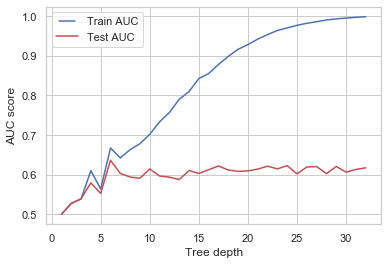

In [179]:
from sklearn.metrics import roc_curve, auc

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = tree.DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train_scaled, y_train)
   train_pred = dt.predict(X_train_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


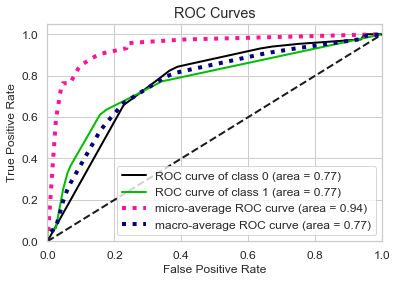

In [181]:
Y_train_Pred=clf.predict(X_train_scaled)

clf_class_select = tree.DecisionTreeClassifier( max_depth=4)
clf_class_select = clf_class_select.fit(X_train_scaled, y_train)
y_test_probs = tree.DecisionTreeClassifier.predict_proba(clf_class_select,X_test_scaled)

skplt.metrics.plot_roc_curve(y_test, y_test_probs)
plt.show()

In [182]:
tree_performance = roc_auc_score(y_test.astype(int), Y_test_Pred.astype(int))

tree_performance

0.7173543281880714

In [183]:
y_pred_dt_final = np.where(y_test_probs[:,0] >= 0.7173543281880714, 0, 1)


accuracy_score(y_test, y_pred_dt_final)

0.8687089715536105

In [184]:
print(classification_report(y_test, y_pred_dt_final, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     10165
           1       0.40      0.36      0.38      1260

    accuracy                           0.87     11425
   macro avg       0.66      0.65      0.65     11425
weighted avg       0.86      0.87      0.87     11425



In [185]:
dot_data = StringIO()
export_graphviz(clf_class_select, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
graph.write_pdf("Amazon_decsion_tree.pdf")

True

# SVM

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=99)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
#scaler.transform(X_train)

In [96]:
clf_SVM = SVC(gamma='rbf',class_weight='balanced',C=10000)
clf_SVM.fit(X_train_scaled, y_train.astype(str)) 


TypeError: must be real number, not str

In [40]:
Y_test_SVM_Pred=clf_SVM.predict(X_test_scaled)
target_names=['0','1']
print(classification_report(y_test, Y_test_SVM_Pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      7074
           1       0.17      0.36      0.23       858

    accuracy                           0.74      7932
   macro avg       0.54      0.57      0.54      7932
weighted avg       0.83      0.74      0.78      7932



In [46]:
Y_test_SVM_Pred=clf_SVM.predict(X_test_scaled)
target_names=['0','1']
print(classification_report(y_test, Y_test_SVM_Pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      7074
           1       0.17      0.37      0.23       858

    accuracy                           0.74      7932
   macro avg       0.54      0.58      0.54      7932
weighted avg       0.83      0.74      0.78      7932



# RandomForest

[1, 11, 21, 31, 41, 51, 62, 72, 82, 92, 102, 113, 123, 133, 143, 153, 163, 174, 184, 194, 204, 214, 225, 235, 245, 255, 265, 275, 286, 296, 306, 316, 326, 337, 347, 357, 367, 377, 387, 398, 408, 418, 428, 438, 449, 459, 469, 479, 489, 500]
50


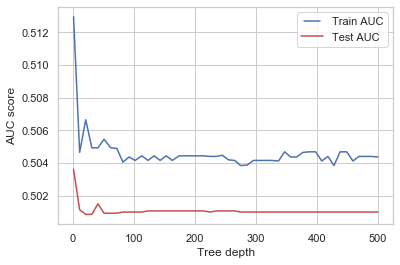

NameError: name 'f1_score_train' is not defined

In [83]:
n_estimators_T = [int(x) for x in np.linspace(start = 1, stop = 500, num = 50)]
print(n_estimators_T)
f1_score_test_T=[]
auc_score_train_T=[]
f1_score_train_T=[]
auc_score_test_T=[]
for n in n_estimators_T:
   clf_RF = RandomForestClassifier(n_estimators=n,random_state=0,max_depth=4)
   clf_RF.fit(X_train_scaled, y_train)
   train_pred = clf_RF.predict(X_train_scaled)
   y_pred = clf_RF.predict(X_test_scaled)
   f1_score_train_T.append(f1_score(y_train, train_pred, average='weighted'))
   f1_score_test_T.append(f1_score(y_test, y_pred, average='weighted'))
   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   auc_score_train_T.append(roc_auc)
   y_pred = clf_RF.predict(X_test_scaled)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   auc_score_test_T.append(roc_auc)
print(len(auc_score_train_T))
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators_T, auc_score_train_T, 'b', label="Train AUC")
line2, = plt.plot(n_estimators_T, auc_score_test_T, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()


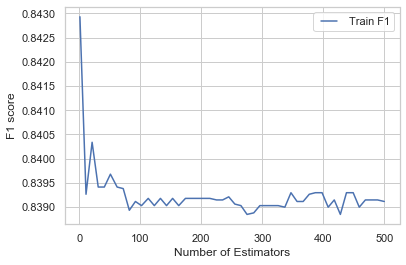

In [186]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators_T, f1_score_train_T, 'b', label="Train F1")
#line2, = plt.plot(n_estimators_T, f1_score_train_T, 'r', label="Test F1")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('Number of Estimators')
plt.show()

In [361]:
clf_RF = RandomForestClassifier(n_estimators=300,random_state=0,max_depth=4,class_weight='balanced')
clf_RF.fit(X_train_scaled, y_train)
Y_train_Pred=clf_RF.predict(X_train_scaled)
Y_test_RF_Pred=clf_RF.predict(X_test_scaled)
print("Training Accuracy",accuracy_score(y_train, Y_train_Pred))
target_names=['0','1']
print(classification_report(y_test, Y_test_RF_Pred, target_names=target_names))

Training Accuracy 0.7307725469908605
              precision    recall  f1-score   support

           0       0.96      0.72      0.83     10165
           1       0.26      0.78      0.39      1260

    accuracy                           0.73     11425
   macro avg       0.61      0.75      0.61     11425
weighted avg       0.89      0.73      0.78     11425



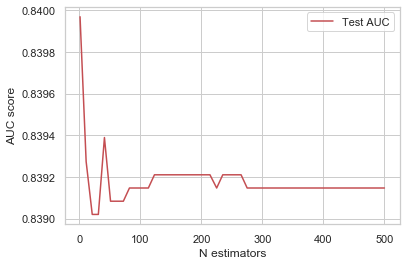

In [188]:
#line1, = plt.plot(n_estimators_T, auc_score_test_T, 'b', label="Train F1")
line2, = plt.plot(n_estimators_T, f1_score_test_T, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=1)})
plt.ylabel('AUC score')
plt.xlabel('N estimators')
plt.show()

In [190]:
temp = ['flesch_reading_ease','smog','coleman_liau','sentence_count','gunning_fog','flesch_kincaid_grade','polarity','politness','spelling_errors','diff_days']
print(list(temp))
clf_RF.feature_importances_ 

['flesch_reading_ease', 'smog', 'coleman_liau', 'sentence_count', 'gunning_fog', 'flesch_kincaid_grade', 'polarity', 'politness', 'spelling_errors', 'diff_days']


array([0.02836983, 0.03835914, 0.01608139, 0.05714568, 0.06109678,
       0.03407494, 0.02902869, 0.00824413, 0.08899706, 0.63860237])

In [263]:
#sent_df = final_df[['diff_days','smog','coleman_liau','sentence_count','gunning_fog','flesch_kincaid_grade','reviews.numHelpful','polarity','subjectivity']]
#sent_df['log_usefull']=np.log(final_df['reviews.numHelpful']+1)


sent_df = final_df[['reviews.numHelpful','diff_days']]
sent_df['log_usefull']=np.log(final_df['reviews.numHelpful']+1)
print(list(sent_df))
X= np.array(sent_df.drop(['reviews.numHelpful','log_usefull'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(sent_df['log_usefull'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

['reviews.numHelpful', 'diff_days', 'log_usefull']


D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Regression

In [209]:
predicted_bin = np.concatenate((Y_train_Pred,Y_test_RF_Pred), axis=0)
sent_df['predicted_bin'] = predicted_bin
sent_df['log_usefull']=np.log(final_df['reviews.numHelpful']+1)

In [210]:
reg = LinearRegression().fit(X_train_scaled, y_train)

In [211]:
y_pred=reg.predict(X_test_scaled)

In [212]:
#scaler.transform(X_test)
mean_squared_error(y_test, np.round(np.exp(y_pred)-1,0))**0.5*100

32.42226859882096

In [213]:
r2_score(y_test,(np.exp(y_pred)-1))

0.12769712374434727

In [214]:
alpha=[0,0.1,100000,1000000,100000,100000,10000,1000,100,10]  
alpha.sort()
print(alpha)
log_error_train=[]
log_error_test=[]
for x in alpha:
    clf_ridge = Ridge(alpha=x)
    clf_ridge.fit(X_train_scaled, y_train) 
    y_pred_0=clf_ridge.predict(X_train_scaled)
    y_pred=clf_ridge.predict(X_train_scaled)
    y_pred=clf_ridge.predict(X_test_scaled)
    #scaler.transform(X_test)
    log_error_train.append(mean_squared_error(np.log(y_test+1), ((y_pred)))**0.5*100)
    log_error_test.append(mean_squared_error(np.log(y_test+1), ((y_pred)))**0.5*100)
    print("alpha=",x," : Train Error : ",mean_squared_error(y_train,np.exp(y_pred_0)-1)**0.5*100," : TEST Error : ",mean_squared_error(y_test,np.exp(y_pred)-1)**0.5*100)


[0, 0.1, 10, 100, 1000, 10000, 100000, 100000, 100000, 1000000]
alpha= 0  : Train Error :  29.52477788479148  : TEST Error :  29.25609836674671
alpha= 0.1  : Train Error :  29.524773518885716  : TEST Error :  29.256095836309065
alpha= 10  : Train Error :  29.524342510125724  : TEST Error :  29.25584405937859
alpha= 100  : Train Error :  29.520526695814663  : TEST Error :  29.25346903050053
alpha= 1000  : Train Error :  29.4896241063063  : TEST Error :  29.230885449468236
alpha= 10000  : Train Error :  29.486550097747948  : TEST Error :  29.29060136574646
alpha= 100000  : Train Error :  30.46499404419412  : TEST Error :  30.457871065791892
alpha= 100000  : Train Error :  30.46499404419412  : TEST Error :  30.457871065791892
alpha= 100000  : Train Error :  30.46499404419412  : TEST Error :  30.457871065791892
alpha= 1000000  : Train Error :  31.12593693925024  : TEST Error :  31.20313246374607


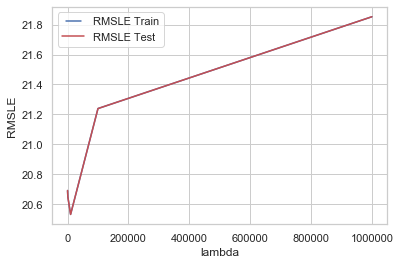

In [217]:
line1, = plt.plot(alpha, log_error_train, 'b', label="RMSLE Train")
line2, = plt.plot(alpha, log_error_test, 'r', label="RMSLE Test")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMSLE')
plt.xlabel('lambda')
plt.show()

In [215]:
clf_ridge = Ridge(alpha=1000)
clf_ridge.fit(X_train_scaled, y_train) 
y_pred=clf_ridge.predict(X_test_scaled)
mean_squared_error(y_test, np.round(np.exp(y_pred)-1,0))**0.5*100

32.3817491887817

In [216]:
r2_score(y_test,(np.exp(y_pred)-1))

0.12919997782063197

# RandomForest

In [307]:
list(final_df)

['diff_days',
 'day_of_week',
 'reviews_dateAdded_hour',
 'reviews.rating',
 'smog',
 'coleman_liau',
 'sentence_count',
 'reviews.numHelpful',
 'gunning_fog',
 'flesch_kincaid_grade',
 'usefull_bin',
 'usefull_diff',
 'subjectivity',
 'polarity',
 'politeness',
 'spelling_errors',
 'flesch_reading_ease']

In [341]:
temp_df_2=final_df
temp_df_2['log_usefull']=np.log(final_df['reviews.numHelpful']+1)

D:\Installed_Applications\Anaconda\envs\Yelp\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [342]:
new_regress_df=temp_df_2[['flesch_reading_ease','smog','coleman_liau','sentence_count','gunning_fog','flesch_kincaid_grade',
                          'polarity','politeness','diff_days','log_usefull']]

In [362]:
predicted_bin = np.concatenate((Y_train_Pred,Y_test_RF_Pred), axis=0)
new_regress_df['predicted_bin'] = predicted_bin

ValueError: Length of values does not match length of index

In [344]:
new_regress_df=new_regress_df.dropna()

In [345]:
X= np.array(new_regress_df.drop(['log_usefull'], axis=1))
#X= np.array(analysis_df['smog'])
Y= np.array(new_regress_df['log_usefull'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=303)
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [346]:
#temp_corr_df = sent_df.drop(['log_usefull'], axis=1)

In [347]:
sent_df=final_df[['flesch_reading_ease','smog','coleman_liau','sentence_count','gunning_fog','flesch_kincaid_grade','reviews.numHelpful','polarity','politeness','spelling_errors','diff_days','reviews.rating']]

In [348]:
temp_corr_df=sent_df
list(temp_corr_df)

['flesch_reading_ease',
 'smog',
 'coleman_liau',
 'sentence_count',
 'gunning_fog',
 'flesch_kincaid_grade',
 'reviews.numHelpful',
 'polarity',
 'politeness',
 'spelling_errors',
 'diff_days',
 'reviews.rating']

In [349]:
rf_regr = RandomForestRegressor( max_depth=4,random_state=0,
                             n_estimators=400)
rf_regr.fit(X_train, y_train)
y_rf_pred = rf_regr.predict(X_test)

In [350]:
mean_squared_error(np.log(y_test+1), ((y_rf_pred)))**0.5*100

21.439023990441104

In [351]:
r2_score(y_test,(np.exp(y_rf_pred)-1))

-47.7379248842041

In [352]:
rf_regr.feature_importances_

array([5.01687668e-03, 2.69091000e-02, 6.11011663e-03, 1.90605674e-01,
       4.62423897e-02, 1.41979143e-02, 1.98843577e-02, 1.48651633e-02,
       6.75511169e-01, 6.57238882e-04])

In [303]:
temp_corr_df.rename(columns={
    'flesch_reading_ease':'FRSE',
    'flesch_kincaid_grade':'FKG',
        'smog':'SMOG',
     'politness':'politeness',
    'diff_days':'No.Days',
    'reviews.rating':'stars',
    'reviews.numHelpful': 'useful',
    'sentence_count': 'sent_cnt',
    'gunning_fog': 'Gunning',
    'coleman_liau':"Coleman",
    'spelling_errors': 'Spell_err:'
}, inplace=True
                   )

In [305]:
corr_df = temp_corr_df
corr = (corr_df.corr())



corr = np.round((corr_df.corr()),2)
corr.style.background_gradient(cmap='PuBu') 

,FRSE,SMOG,Coleman,sent_cnt,Gunning,FKG,useful,polarity,politeness,Spell_err:,No.Days,stars
FRSE,1,-0.04,-0.73,0.03,-0.47,-0.92,-0.02,0.07,0.03,-0.09,-0.03,0.03
SMOG,-0.04,1,0.02,0.68,0.04,0.03,0.07,-0.17,0.19,0.57,0.07,-0.07
Coleman,-0.73,0.02,1,-0.05,0.44,0.67,0.02,-0.02,-0.06,0.09,0.03,-0.03
sent_cnt,0.03,0.68,-0.05,1,-0.06,-0.05,0.14,-0.15,0.25,0.82,0.08,-0.08
Gunning,-0.47,0.04,0.44,-0.06,1,0.71,0.05,-0.14,0.03,0.2,0.04,-0.08
FKG,-0.92,0.03,0.67,-0.05,0.71,1,0.04,-0.12,-0,0.16,0.05,-0.06
useful,-0.02,0.07,0.02,0.14,0.05,0.04,1,-0.03,0.02,0.16,0.15,-0.07
polarity,0.07,-0.17,-0.02,-0.15,-0.14,-0.12,-0.03,1,0.13,-0.16,-0.01,0.24
politeness,0.03,0.19,-0.06,0.25,0.03,-0,0.02,0.13,1,0.2,0.02,0.18
Spell_err:,-0.09,0.57,0.09,0.82,0.2,0.16,0.16,-0.16,0.2,1,0.1,-0.1


# Chi Sq Test

In [ ]:
ch_sq_df = final_df[['day_of_week','reviews_dateAdded_hour','reviews.rating']]

In [ ]:
dum_df1 = pd.DataFrame()
dum_df1['hr']=final_df['reviews_dateAdded_hour'].apply(str)
dum_df1['day']=final_df['day_of_week']
dum_df1

In [ ]:
dummy_df = pd.get_dummies(dum_df1, prefix=['hour','day'])

In [ ]:
dummy_df

In [ ]:
sent_df = final_df[['smog','coleman_liau','sentence_count','gunning_fog','flesch_kincaid_grade','reviews.rating']]
pd_combined=pd.concat([dummy_df.reset_index(drop=True), sent_df.reset_index(drop=True)], axis=1)
pd_combined=pd_combined.dropna()
pd_combined.columns

In [ ]:
pd_combined

In [ ]:
X= np.array(pd_combined.drop('reviews.rating', axis=1))
Y= np.array(pd_combined['reviews.rating'])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=99)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3,min_impurity_split=100)
clf = clf.fit(X_train, y_train)

In [ ]:
Y_test_Pred=clf.predict(X_test)

In [ ]:
Y_test_Pred

In [ ]:
accuracy_score(y_test, Y_test_Pred)

In [ ]:
target_names = ['1', '2', '3', '4', '5']
print(classification_report(y_test, Y_test_Pred, target_names=target_names))

In [ ]:
clf_RF = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf_RF.fit(X_train, y_train)

In [ ]:
print(clf_RF.feature_importances_)

In [ ]:
Y_test_RF_Pred=clf_RF.predict(X_test)

In [ ]:
accuracy_score(y_test, Y_test_RF_Pred)

In [ ]:
target_names = ['0', '1', '3', '4', '5']
print(classification_report(y_test, Y_test_RF_Pred, target_names=target_names))

In [ ]:
clf_SVM = SVC(gamma='auto',class_weight='balanced')
clf_SVM.fit(X_train, y_train) 


In [ ]:
Y_test_SVM_Pred=clf_SVM.predict(X_test)

In [ ]:
print(classification_report(y_test, Y_test_SVM_Pred, target_names=target_names))

In [ ]:
accuracy_score(y_test, Y_test_SVM_Pred)